In [3]:
import pydicom as dicom

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import shutil

%matplotlib inline

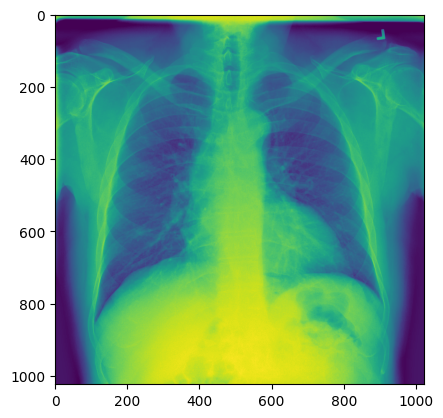

In [2]:
# show sample dicom image
img = 'train_images/' + np.random.choice(os.listdir('train_images/'), 1)[0]

# read the image
ds = dicom.dcmread(img)

# plot sample image
plt.imshow(ds.pixel_array)
plt.grid(False)
plt.show()

# Gather statistics about the dataset

In [4]:
train_data = pd.read_csv('stage_2_detailed_class_info.csv')
train_data.head(3)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal


In [5]:
train_data['class'].value_counts()

class
No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: count, dtype: int64

In [9]:
# show number of unique id
unique = train_data['patientId'].nunique()

print(f'Number of unique patients: {unique}')
print(f'Ratio of unique patients: {unique / len(train_data)}')

Number of unique patients: 26684
Ratio of unique patients: 0.882786912363119


In [19]:
# gather all repeating patients
repeating = train_data.groupby('patientId').agg('count').reset_index()
repeating.rename(columns={'class': 'count'}, inplace=True)
repeating[repeating['count'] > 1].sort_values(by='count', ascending=False)

,patientId,count
2041,1bf08f3b-a273-4f51-bafa-b55ada2c23b5,4
2914,31764d54-ea3b-434f-bae2-8c579ed13799,4
826,0ab261f9-4eb5-42ab-a9a5-e918904d6356,4
24646,ee820aa5-4804-4984-97b3-f0a71d69702f,4
11756,7d674c82-5501-4730-92c5-d241fd6911e7,4
...,...,...
6057,4c75d5dd-63d8-4678-9f22-61340ca246db,2
6078,4ca78474-f750-4feb-adb7-47da99bf4255,2
6084,4cb68d48-e377-4079-a094-2b863723204f,2
6086,4cbb68e5-1ca0-4a2a-b3d2-022110364d7c,2


In [22]:
[x for x in os.listdir('train_images/') if '1bf08f3b-a273-4f51-bafa-b55ada2c23b5' in x]

['1bf08f3b-a273-4f51-bafa-b55ada2c23b5.dcm']

In [23]:
ds = dicom.dcmread('train_images/1bf08f3b-a273-4f51-bafa-b55ada2c23b5.dcm')
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.31533.1517874509.634917
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.31533.1517874509.634917
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [36]:
ap_view_count, ap_view_id = 0, []
other_view_count, other_view_selection, other_view_id = 0, [], []

for path in os.listdir('train_images/'):
    ds = dicom.dcmread(f'train_images/{path}')

    if ds.ViewPosition.lower() != 'ap':
        other_view_count += 1
        other_view_selection.append(ds.ViewPosition)
        other_view_id.append(path)
    else:
        ap_view_count += 1
        ap_view_id.append(path)

print('Total AP count:', ap_view)
print('Totoal other projections:', other_view)

Total AP count: 12173
Totoal other projections: 14511


In [37]:
set(other_view_selection)

{'PA'}

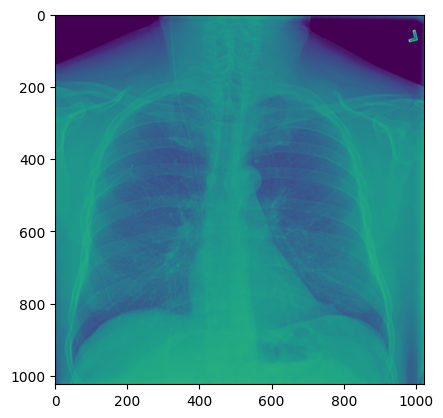

In [45]:
plt.imshow(dicom.dcmread(f'train_images/{other_view_id[8]}').pixel_array)

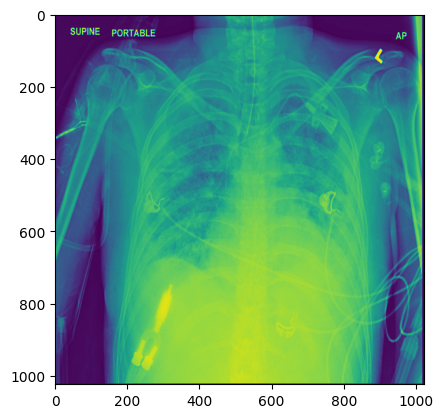

In [26]:
plt.imshow(ds.pixel_array)

In [ ]:
# show example with four counts
fig, ax = plt.figure(2, 2, sharex=True, sharey=True, figsize=(20, 10))
ax[0, 0]